<a href="https://colab.research.google.com/github/IshaSinghVatsa/SpatioTempDA/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 34.2 MB/s 
     |████████████████████████████████| 16.7 MB 46.9 MB/s 


In [2]:
pip install pysal


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 81 kB/s 
     |████████████████████████████████| 5.7 MB 12.3 MB/s 
     |████████████████████████████████| 60 kB 7.7 MB/s 
     |████████████████████████████████| 116 kB 53.9 MB/s 
     |████████████████████████████████| 243 kB 39.0 MB/s 
     |████████████████████████████████| 41 kB 616 kB/s 
     |████████████████████████████████| 147 kB 41.4 MB/s 
     |████████████████████████████████| 2.4 MB 7.0 MB/s 
     |████████████████████████████████| 220 kB 44.5 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 179 kB 42.0 MB/s 
     |████████████████████████████████| 2.1 MB 39.3 MB/s 
     |████████████████████████████████| 183 kB 54.4 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 1.0 M

In [3]:
#import pymove as pm
#from pymove.utils import integration as it
#from pymove.visualization import folium
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib
import pysal as ps
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

US MAP

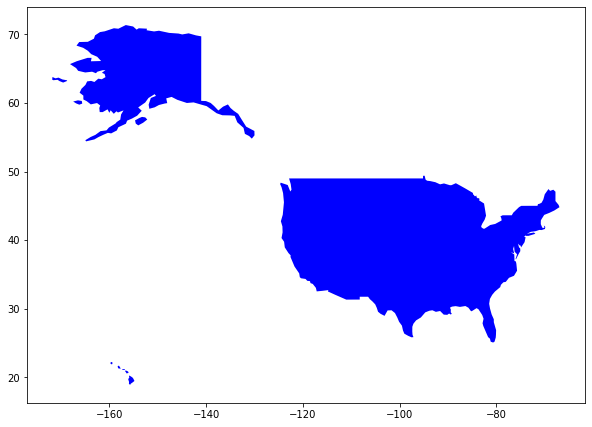

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
turkey = world[world['name'] == 'United States of America']
fig,ax = plt.subplots(figsize = (10,10))
turkey.plot(ax = ax, color='blue')

WORLD MAP

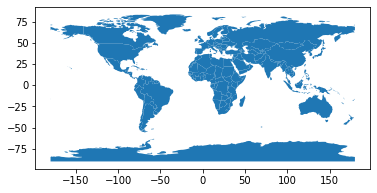

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [6]:
df = pd.read_csv('/content/Earthquake-data-sptd.csv', nrows=1801)
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,12/25/1970,12:53:36,-0.394,-19.240,Earthquake,15.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM789478,ISCGEM,ISCGEM,ISCGEM,Automatic
1797,12/28/1970,20:03:26,-5.242,153.520,Earthquake,55.0,NaN,NaN,6.6,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM789605,ISCGEM,ISCGEM,ISCGEM,Automatic
1798,12/29/1970,02:26:08,-10.436,161.395,Earthquake,30.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM789614,ISCGEM,ISCGEM,ISCGEM,Automatic
1799,12/29/1970,08:01:59,-3.974,-81.020,Earthquake,35.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM789621,ISCGEM,ISCGEM,ISCGEM,Automatic


EXTRACTING DATA OF US ONLY

In [7]:
df=df[df['Latitude']>= -75]
df=df[df['Longitude']<= -20]

In [8]:
data = df[['Latitude'	,'Longitude','Magnitude']]
data.head()

,Latitude,Longitude,Magnitude
2,-20.579,-173.972,6.2
3,-59.076,-23.557,5.8
8,-56.452,-27.043,6.0
13,-18.697,-177.864,5.6
32,13.245,-44.922,5.8


MAKING GEOMETRY POINTS FOR US

In [9]:
new_data = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['Latitude'],data['Longitude']))

In [10]:
crs = {'init': 'epsg:4326'} #Coordinate Reference System
geometry = [Point(xy) for xy in zip( new_data["Longitude"], new_data["Latitude"])]
ports = gpd.GeoDataFrame(new_data, crs = crs, geometry = geometry)
ports.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Latitude,Longitude,Magnitude,geometry
2,-20.579,-173.972,6.2,POINT (-173.97200 -20.57900)
3,-59.076,-23.557,5.8,POINT (-23.55700 -59.07600)
8,-56.452,-27.043,6.0,POINT (-27.04300 -56.45200)
13,-18.697,-177.864,5.6,POINT (-177.86400 -18.69700)
32,13.245,-44.922,5.8,POINT (-44.92200 13.24500)


In [11]:
bright=new_data.copy()

In [12]:
#bright=bright[bright['Magnitude']>=3]

In [13]:
bright.head()

,Latitude,Longitude,Magnitude,geometry
2,-20.579,-173.972,6.2,POINT (-173.97200 -20.57900)
3,-59.076,-23.557,5.8,POINT (-23.55700 -59.07600)
8,-56.452,-27.043,6.0,POINT (-27.04300 -56.45200)
13,-18.697,-177.864,5.6,POINT (-177.86400 -18.69700)
32,13.245,-44.922,5.8,POINT (-44.92200 13.24500)


PLOTTING POINTS WHERE US EXPERIENCE EARTHQUAKE

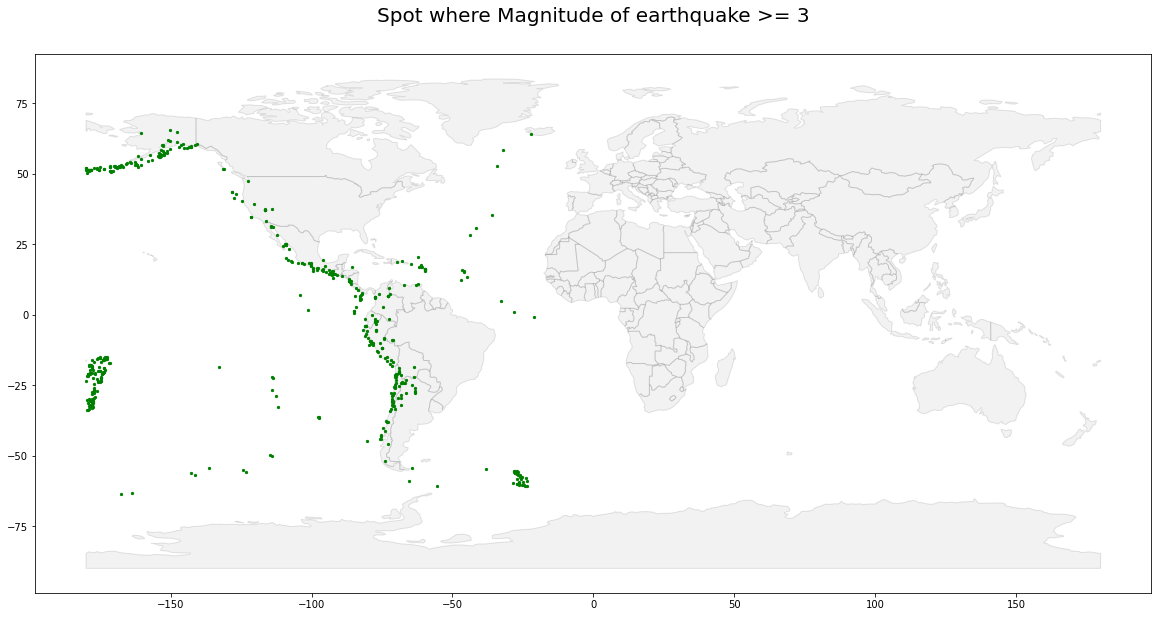

In [14]:
fig,ax = plt.subplots(figsize = (20,50))
title = plt.title('Spot where Magnitude of earthquake >= 3', fontsize=20)
title.set_position([0.5, 1.05])
world.plot(ax = ax, color='grey', edgecolor='black',linewidth=1, alpha=0.1)
bright.plot(marker='o', color='green', markersize=5, ax=ax)

In [15]:
bright=bright[bright['Magnitude']>=6]

POINTS WHERE EARTHQUAKE MAGNITUDE IS >= 6

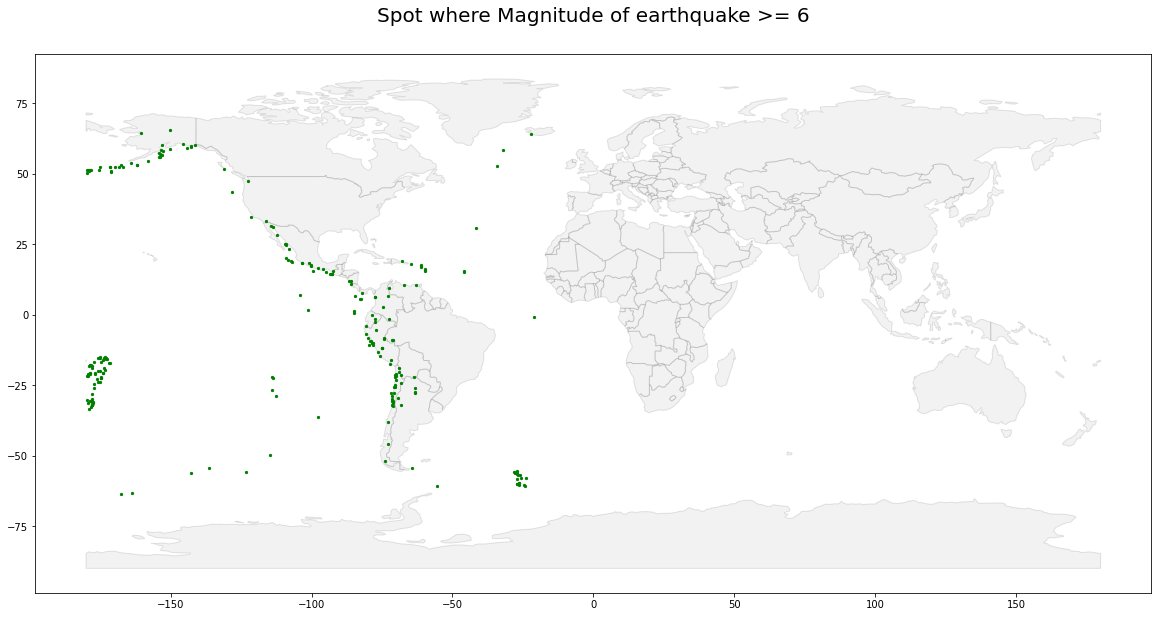

In [16]:
fig,ax = plt.subplots(figsize = (20,50))
title = plt.title('Spot where Magnitude of earthquake >= 6', fontsize=20)
title.set_position([0.5, 1.05])
world.plot(ax = ax, color='grey', edgecolor='black',linewidth=1, alpha=0.1)
bright.plot(marker='o', color='green', markersize=5, ax=ax)

In [27]:
tf = pd.read_csv('/content/Earthquake-data-sptd.csv', nrows=1801)
tf=tf.head(250)
tf

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,08/30/1965,03:32:08,-16.931,167.454,Earthquake,30.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM855027,ISCGEM,ISCGEM,ISCGEM,Automatic
246,08/30/1965,18:09:44,-6.428,104.667,Earthquake,55.0,NaN,NaN,5.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP855043,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
247,09-01-1965,04:47:33,-34.596,179.922,Earthquake,100.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP853515,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
248,09-02-1965,04:26:39,51.867,175.451,Earthquake,31.0,NaN,NaN,5.5,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM853538,ISCGEM,ISCGEM,ISCGEM,Automatic


In [28]:
# Using graph_objects
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure([go.Scatter(x=tf['Date'], y=tf['Magnitude'])])
fig.show()